<a href="https://colab.research.google.com/github/KawsarMU47/Covid-19-Detection-/blob/main/ML_Lab(Covid_19_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive

 archive.zip			        HigherMath.xlsx
'Ch3. Agile SW Dev.pptx'	       'Metropolitan University'
'Ch4 Req Eng.pptx'		       'ML Lab(Covid 19 Detection).ipynb'
'Ch5 System modeling.pptx'	        Project200
'Ch6 Architectural design.pptx'         Untitled0.ipynb
'Ch7 Implementation.pptx'	        Untitled1.ipynb
 Ch8.Testing.pptx		        Untitled2.ipynb
'Ch9 Evolution.pptx'		        Untitled3.ipynb
 Classroom			        Untitled4.ipynb
'Colab Notebooks'		        Untitled5.ipynb
 CPI_lecture.gdoc		        Untitled6.ipynb
 DOC-20220908-WA0006.		        Untitled8.ipynb
 f716b62091304c432a44c981363416a9.pdf  'Untitled spreadsheet.gsheet'
 HigherMath.gsheet


In [ ]:
!unzip gdrive/MyDrive/archive.zip


Archive:  gdrive/MyDrive/archive.zip
  inflating: Dataset/Prediction/NORMAL2-IM-0338-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0339-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0340-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0341-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0352-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0353-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0357-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0370-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0372-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0373-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0374-0001.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-

In [ ]:
import pandas as pd
import os
import shutil
print(os.listdir("/content/Dataset"))

['Prediction', 'Train', 'Val']


In [ ]:
TRAIN_PATH = "/content/Dataset/Train"
VAL_PATH = "/content/Dataset/Val"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 57s 7s/step - loss: 0.6944 - accuracy: 0.5898 - val_loss: 0.6819 - val_accuracy: 0.8000
Epoch 2/10
8/8 [==============================] - 53s 7s/step - loss: 0.5724 - accuracy: 0.7227 - val_loss: 0.4665 - val_accuracy: 0.8167
Epoch 3/10
8/8 [==============================] - 53s 7s/step - loss: 0.3027 - accuracy: 0.8867 - val_loss: 0.2160 - val_accuracy: 0.8833
Epoch 4/10
8/8 [==============================] - 54s 7s/step - loss: 0.2923 - accuracy: 0.8906 - val_loss: 0.2157 - val_accuracy: 0.9833
Epoch 5/10
8/8 [==============================] - 53s 7s/step - loss: 0.2827 - accuracy: 0.9023 - val_loss: 0.5310 - val_accuracy: 0.8833
Epoch 6/10
8/8 [==============================] - 53s 7s/step - loss: 0.2922 - accuracy: 0.8984 - val_loss: 0.1940 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 54s 7s/step - loss: 0.2598 - accuracy: 0.9023 - val_loss: 0.1510 - val_accuracy: 1.0000
Epoch 8/10
8/8 [==================

In [ ]:
model.save("Detection_Covid_19.h5")

In [ ]:
# model.evaluate_generator(train_generator)

In [ ]:
# model.evaluate_generator(validation_generator)

In [ ]:
model = load_model("Detection_Covid_19.h5")

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
from keras.utils import load_img, img_to_array

In [ ]:
for i in os.listdir("/content/Dataset/Val/Normal"):
  img = load_img("/content/Dataset/Val/Normal/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 57ms/step


In [ ]:
for i in os.listdir("/content/Dataset/Val/Covid"):
  img = load_img("/content/Dataset/Val/Covid/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 58ms/step


In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sns

In [ ]:
# sns.heatmap(cm,cmap = "plasma" , annot=True)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30  0]
 [ 1 29]]


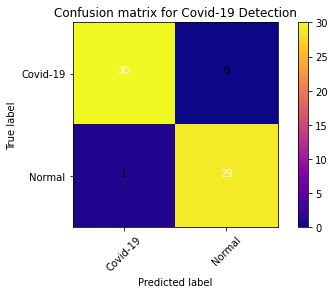

In [ ]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")

In [ ]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[0.58984375, 0.72265625, 0.88671875, 0.890625, 0.90234375, 0.8984375, 0.90234375, 0.90625, 0.94921875, 0.94140625]


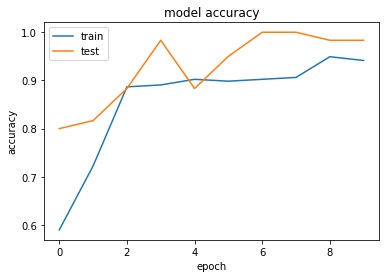

In [37]:
plt.plot(history.history['accuracy'])
print(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

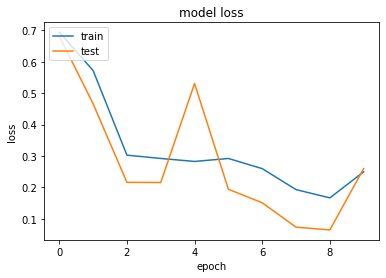

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 62ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


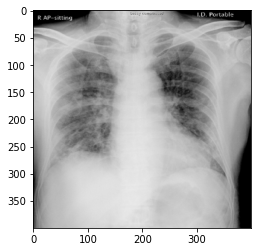

In [ ]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image =load_img('/content/Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))
xtest_image =img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices
imggg = cv2.imread('Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

1/1 [==============================] - 0s 61ms/step
This Xray Image is of Negative covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


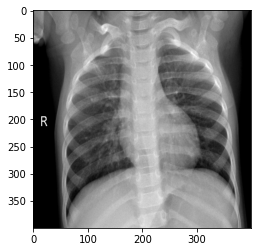

In [ ]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = load_img('/content/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg', target_size = (224, 224))
xtest_image = img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices

imggg = cv2.imread('Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)